# Sabermetrics Final Project, Injury Recovery Stat
### Lai Tsun Hin
### In this project, you will have to run the following code with the csv data created through SQL, this is done to look at the statistics of the players under a scoring metric I created.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
local_path = 'data//ScoringMetric.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfTW= pd.read_csv(file_path)

# Inspect some of the data
dfTW

,playerID,nameFirst,nameLast,yearID,teamID,G,AB,H,2B,3B,HR,R,RBI,SB,SO,Score
0,pujolal01,Albert,Pujols,2009,SLN,160,568,186,45,1,47,124,135,16,64,100.000000
1,martijd02,J. D.,Martinez,2017,ARI,62,232,70,13,1,29,47,65,2,74,96.939620
2,pujolal01,Albert,Pujols,2008,SLN,148,524,187,44,0,37,100,116,7,54,94.837145
3,cabremi01,Miguel,Cabrera,2013,DET,148,555,193,26,1,44,103,137,3,94,94.144144
4,cabremi01,Miguel,Cabrera,2010,DET,150,548,180,45,1,38,111,126,3,95,92.444444
5,troutmi01,Mike,Trout,2017,LAA,114,402,123,25,3,33,92,72,22,90,91.587944
6,pujolal01,Albert,Pujols,2010,SLN,159,587,183,39,1,42,115,118,14,76,91.404612
7,harpebr03,Bryce,Harper,2017,WSN,111,420,134,27,1,29,95,87,4,99,90.043890
8,bautijo02,Jose,Bautista,2011,TOR,149,513,155,24,2,43,105,103,9,111,89.554294
9,stantmi03,Giancarlo,Stanton,2017,MIA,159,597,168,32,0,59,123,132,2,163,88.985647


### This helps you look at the specfic players with injuries by their first and last name.

In [21]:
nameFirst = 'Tyler'
nameLast = 'Colvin'
playerfirst = dfTW[dfTW['nameFirst']==nameFirst]
playerlast = playerfirst[playerfirst['nameLast']==nameLast]
playerlast.sort_values('yearID')

,playerID,nameFirst,nameLast,yearID,teamID,G,AB,H,2B,3B,HR,R,RBI,SB,SO,Score
2073,colvity01,Tyler,Colvin,2010,CHN,135,358,91,18,5,20,60,56,6,100,46.115859
3174,colvity01,Tyler,Colvin,2011,CHN,80,206,31,8,3,6,17,20,0,58,26.282051
1465,colvity01,Tyler,Colvin,2012,COL,136,420,122,27,10,18,62,72,7,117,52.865762


### This gives you a sense of production, by inputting the player's first and last name, with the injured year, you will be able to see the performance pre and post injury.

In [28]:
nameFirst = 'Joey'
nameLast = 'Votto'
year = 2014
playerfirst = dfTW[dfTW['nameFirst']==nameFirst]
playerlast = playerfirst[playerfirst['nameLast']==nameLast]
playeryear = playerlast[playerlast['yearID'] >= year-1]
playeryear.sort_values('yearID')

,playerID,nameFirst,nameLast,yearID,teamID,G,AB,H,2B,3B,HR,R,RBI,SB,SO,Score
205,vottojo01,Joey,Votto,2013,CIN,162,581,177,30,3,24,101,73,6,138,73.440962
853,vottojo01,Joey,Votto,2014,CIN,62,220,56,16,0,6,32,23,1,49,60.215054
104,vottojo01,Joey,Votto,2015,CIN,158,545,171,33,2,29,95,80,11,135,77.507303
98,vottojo01,Joey,Votto,2016,CIN,158,556,181,34,2,29,101,97,8,120,77.766959
25,vottojo01,Joey,Votto,2017,CIN,162,559,179,34,1,36,106,100,5,83,84.013928


### This sorts the scores on each team by the input year. This statistic could be useful during the time of a star injury to look at how other players on the team performed and if the player itself got out performed.

In [49]:
teamID = 'CIN'
yearID = 2014
teamStats = dfTW[dfTW['teamID'] == teamID]
teamStatsYear = teamStats[teamStats['yearID'] == yearID]
teamStatsYear = teamStatsYear[teamStatsYear.Score != 0]
teamStatsYear

,playerID,nameFirst,nameLast,yearID,teamID,G,AB,H,2B,3B,HR,R,RBI,SB,SO,Score
544,mesorde01,Devin,Mesoraco,2014,CIN,114,384,105,25,0,25,54,80,1,103,64.507422
789,frazito01,Todd,Frazier,2014,CIN,157,597,163,22,1,29,88,80,20,139,60.917851
853,vottojo01,Joey,Votto,2014,CIN,62,220,56,16,0,6,32,23,1,49,60.215054
1685,bruceja01,Jay,Bruce,2014,CIN,137,493,107,21,1,18,71,66,12,149,50.271383
2057,phillbr01,Brandon,Phillips,2014,CIN,121,462,123,25,0,8,44,51,2,74,46.280992
2111,hamilbi02,Billy,Hamilton,2014,CIN,152,563,141,25,8,6,72,48,56,117,45.715250
2612,ludwiry01,Ryan,Ludwick,2014,CIN,112,357,87,20,0,9,28,45,0,94,39.468864
2906,cozarza01,Zack,Cozart,2014,CIN,147,506,112,18,5,4,48,38,7,79,34.606663
2984,penabr01,Brayan,Pena,2014,CIN,115,348,88,18,1,5,23,26,2,42,32.820513
3037,schumsk01,Skip,Schumaker,2014,CIN,83,247,58,12,0,2,22,22,2,50,31.139944


### shows the score different

Text(0.5,1,'score per year')

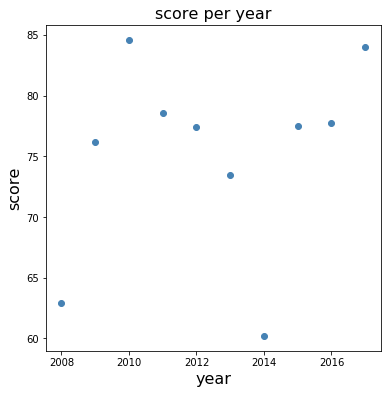

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(playerlast["yearID"], playerlast["Score"], color = "steelblue")
axes.set_xlabel("year", fontsize=16)
axes.set_ylabel("score", fontsize=16)
axes.set_title("score per year", fontsize=16)


### With that in mind we can calculate the percentage change before and after injury per year. The best will act as the deminator and calculate each year's recovery based on the stats before the player is injured.

In [ ]:
2013 = 73.440962
2014 = 60.215054
2015 = 77.507303
2016 = 77.766959
2017 = 84.013928

In [ ]:
2013 = 100%
2014 = 81.99%
2015 = 105.54%
2016 = 105.89%
2017 = 114.40%